# Single Phase Diffusion

## Example - NiCrAl System

Along with precipitation, kawin also supports one dimensional diffusion models. In this example, a diffusion couple will be simulated between two different NiCrAl compositions. Both phases will be FCC.

Note: Fluxes are calculated on a volume fixed frame of reference. In this frame of reference, the location of the Matano plane is fixed. If a lattice fixed frame of reference is used, then the movement of the Matano plane would move (this would be similar to the Smigelskas–Kirkendall experiments).

## Setup

The diffusion model handles the mesh creation and interfaces with the Thermodynamics module to compute fluxes from mobility and the curvature of the Gibbs free energy surface

Loading the Thermodynamics object is the same as done for creating a precipitation model.

In [1]:
from kawin.Thermodynamics import MulticomponentThermodynamics

therm = MulticomponentThermodynamics('NiCrAl.tdb', ['NI', 'CR', 'AL'], ['FCC_A1'])

The next step is to create the diffusion model. The model requires the z-coordinates, elements and phases upon initialization. Initial conditions can be added with the composition either as a step function, linear function, delta function or a user-defined function. Finally, boundary conditions are assumed to be no-flux conditions; however, constant flux or composition may also be defined.

Defining the initial and boundary conditions must specify the element it is being applied to.

Here, a diffusion couple composed of Ni-7.7Cr-5.4Al / Ni-35.9Cr-6.2Al will be used.

Plotting functions are stored in the diffusion object and can be used to look at the initial conditions.

(0.0, 0.4)

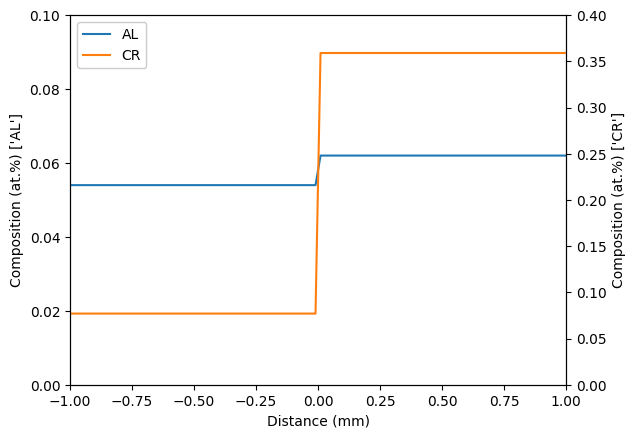

In [2]:
from kawin.Diffusion import SinglePhaseModel
import matplotlib.pyplot as plt

#Define mesh spanning between -1mm to 1mm with 50 volume elements
m = SinglePhaseModel([-1e-3, 1e-3], 100, ['NI', 'CR', 'AL'], ['FCC_A1'])

#Define Cr and Al composition, with step-wise change at z=0
m.setCompositionStep(0.077, 0.359, 0, 'CR')
m.setCompositionStep(0.054, 0.062, 0, 'AL')

fig, axL = plt.subplots(1, 1)
axL, axR = m.plotTwoAxis(axL, ['AL'], ['CR'], zScale = 1/1000)
axL.set_xlim([-1, 1])
axL.set_xlabel('Distance (mm)')
axL.set_ylim([0, 0.1])
axR.set_ylim([0, 0.4])

In addition to the initial and boundary conditions, the temperature and Thermodynamics object must be supplied to the diffusion model.

Similar to the precipitation model, progress on the simulation can be outputted by setting verbose to True and setting vIt to the number of iterations before a status update on the model is outputted.

In [3]:
m.setThermodynamics(therm)
m.setTemperature(1200 + 273.15)

m.solve(100*3600, verbose=True, vIt=100)

Iteration	Sim Time (h)	Run time (s)
0		0.000		0.000
100		28.638		3.885
200		57.276		7.593
300		85.924		9.631
349		100.000		10.215


### Plotting

Plotting the final composition profile is the same as plotting the initial profile.

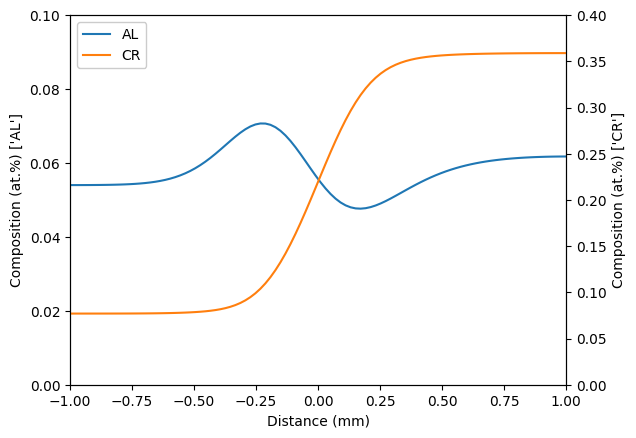

In [4]:
fig, axL = plt.subplots(1, 1)
axL, axR = m.plotTwoAxis(axL, ['AL'], ['CR'], zScale = 1/1000)
axL.set_xlim([-1, 1])
axL.set_xlabel('Distance (mm)')
axL.set_ylim([0, 0.1])
axR.set_ylim([0, 0.4])
plt.show()

## References

1. A. Borgenstam, A. Engstrom, L. Hoglund, J. Agren, "DICTRA, a Tool for Simulation of Diffusional Transformations in Alloys" *Journal of Phase Equilibria* 21 (2000) p. 269
2. A. Engstrom and J. Agren, "Assessment of Diffusional MObilities in Face-Centered Cubic Ni-Cr-Al Alloys" *Z. Metallkd.* 87 (1996) p. 92